In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def m_rungekutta4(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
    return(y)

In [3]:
# pendulo amortiguado con fuerza externa y friccion.
    # Input:
    # t: tiempo
    # y: vector del péndulo [ángulo, vel angular] 
    # args['alpha']: g/l_pendulo
    # args['beta']: fr/m_pendulo
    # args['gamma']: F_ext/(m_pendulo*l_pendulo)
    # args['omega']: freq_ext
# Output: dydt, arreglo de solución

def pendulo(t,y,args):
    dydt = zeros(2)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin(y[0]) - args['beta']*y[1] + args['gamma']*cos(args['omega']*t)
    return dydt
    

In [4]:
#parámetros
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 0. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 200 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo



In [5]:
# definir los argumentos
args_sol = {}
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext




In [6]:
# Condiciones Iniciales
# angulos pequeños
theta_0 = pi/16
w_0 = 0
c_i = array([theta_0,w_0])

In [7]:
y = m_rungekutta4(pendulo, c_i, t, args_sol)
# solución analítica
# x peq, ==> sin(x)~x.  y = theta0*cos(sqrt(alpha)*t)
y_theta_peq = theta_0 * cos(sqrt(args_sol['alpha'])*t)



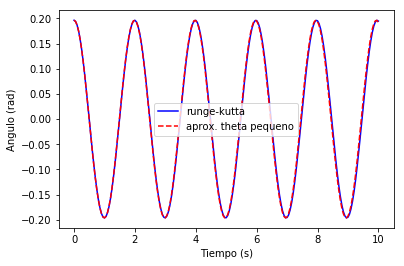

In [8]:
# Grafique la dinámica
plt.plot(t, y[:,0], c='b', label='runge-kutta')
plt.plot(t, y_theta_peq, 'r--', label='aprox. theta pequeno')
plt.xlabel('Tiempo (s)')
plt.ylabel('Angulo (rad)')
plt.legend(loc='best')

In [9]:
def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')

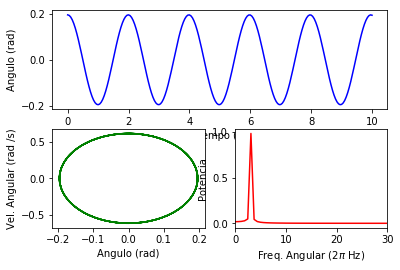

In [10]:
graficar_fase_pendulo(t,y)

In [11]:
fr = 0.8 #kg/(m*s)
args_sol['beta'] = fr/m_pendulo
y = m_rungekutta4(pendulo, c_i, t, args_sol)

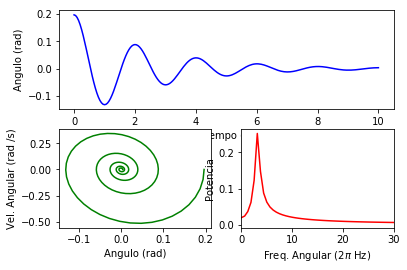

In [12]:
graficar_fase_pendulo(t,y)

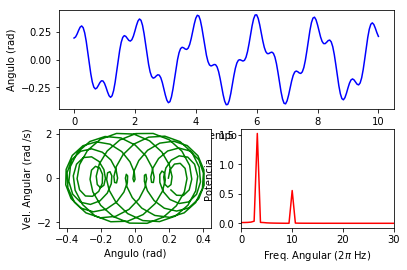

In [13]:
fr = 0 #kg/(m*s)
F_ext = 10 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo, c_i, t, args_sol)
graficar_fase_pendulo(t,y)

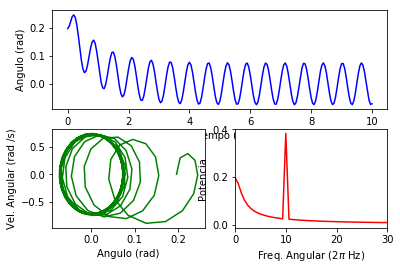

In [14]:
fr = 10 #kg/(m*s)
F_ext = 10 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo, c_i, t, args_sol)
graficar_fase_pendulo(t,y)

# Now we'll make this stochastic

In [15]:
h = t[1]-t[0]
def pendulo2(t,y,args):
    dydt = zeros(2)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin(y[0]) - args['beta']*y[1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))
    return dydt
    

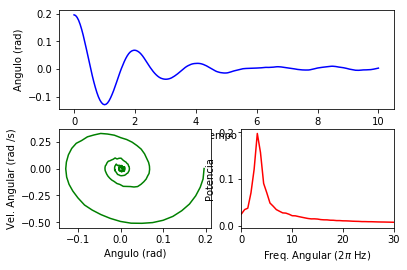

In [16]:
fr = 1 #kg/(m*s)
F_ext = 0 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo2, c_i, t, args_sol)
graficar_fase_pendulo(t,y)
    

# Now, we'll Make this interacting

In [17]:
# Condiciones Iniciales
# angulos pequeños
theta_01 = pi/16
w_01 = 1
theta_02 = -pi/16
w_02 = -1
c_i_mult = array([theta_01,w_01,theta_02,w_02])

g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 2000 # n_puntos

t = linspace(0., 100., N+1) # [s] arreglo de n_puntos en el tiempo



In [18]:
h = t[1]-t[0]
def pendulo3(t,y,args):
    dydt = zeros(4)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin((y[0]-y[2])) - args['beta']*y[1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))
    dydt[2] = y[3] #primera ecuación
    dydt[3] = -args['alpha']*sin((y[2]-y[0])) - args['beta']*y[3] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt
    

In [19]:
def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle 1
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.plot(t, y[:,2], c='b',ls='--')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.plot(y[:,2], y[:,3], c='g',ls='--')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')
    
   

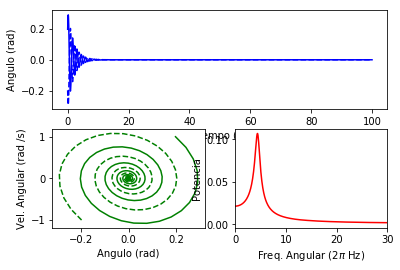

In [20]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 0
args_sol['omega'] = 0

y = m_rungekutta4(pendulo3, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)
    

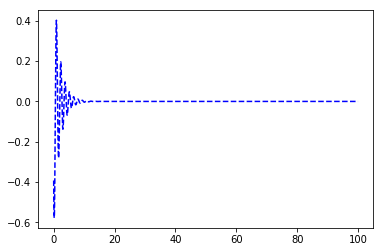

In [21]:

plot(t, y[:,2]-y[:,0], c='b',ls='--')


# Now we make an N body stochastic simmulation

In [22]:
# Condiciones Iniciales
# angulos pequeños
M=20
c_i_mult = np.zeros(2*M)
X_loc=0
X_scale=1
V_loc=3
V_scale=1
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = V_loc, scale = V_scale)
'''

theta_01 = pi/16
w_01 = 1
theta_02 = -pi/16
w_02 = -1
c_i_mult = array([theta_01,w_01,theta_02,w_02])
'''
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 2000 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo


In [23]:
def force(y1,y2,v1,v2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def force2(y1,y2,v1,v2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*exp(-((y1-y2)/rangei)**2) 


def pairF(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2(y[i],y[j],y[i+1],y[j+1],t)
    return F
        
def extF(yi,t):
    return sin(yi)
    

In [24]:
h = t[1]-t[0]
def pendulo4(t,y,args):
    dydt = np.zeros(2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairF(i,y,t) + args['alpha']*extF(y[i],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

    return dydt 

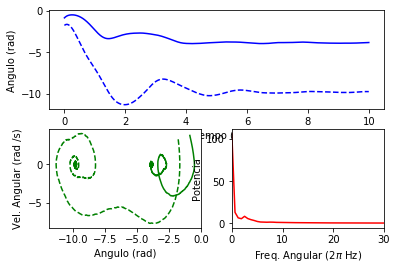

In [25]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 100
args_sol['omega'] = 0

y = m_rungekutta4(pendulo4, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)


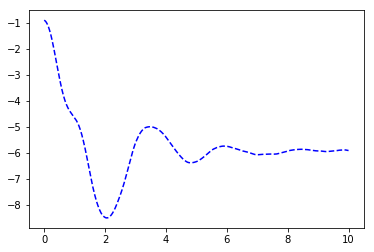

In [26]:
plot(t, y[:,2]-y[:,0], c='b',ls='--')

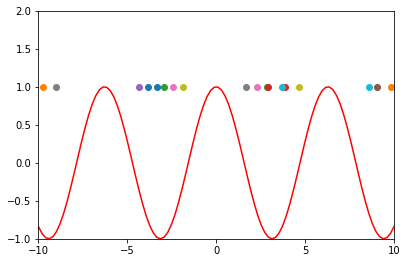

In [27]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-10,10))
ax.set_ylim((-1,2))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-10,10,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j]/y[5*i,2*j])



    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('Evol1D.gif', writer='imagemagick', fps=24)

# Now we will make this into a 2D system

In [28]:
# Condiciones Iniciales
# angulos pequeños
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


X_loc=0
X_scale=1
VX_loc=3
VX_scale=1
Y_loc=0
Y_scale=1
VY_loc=3
VY_scale=1
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)
'''

theta_01 = pi/16
w_01 = 1
theta_02 = -pi/16
w_02 = -1
c_i_mult = array([theta_01,w_01,theta_02,w_02])
'''
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 2000 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo

In [29]:

def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*exp(-((y1-y2)/rangei)**2-((w1-w2)/rangei)**2)

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force3X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force3Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return sin(yi)

def extFY(yi,wi,t):
    return sin(wi)

In [30]:
h = t[1]-t[0]
def pendulo5(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['alpha']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['alpha']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 

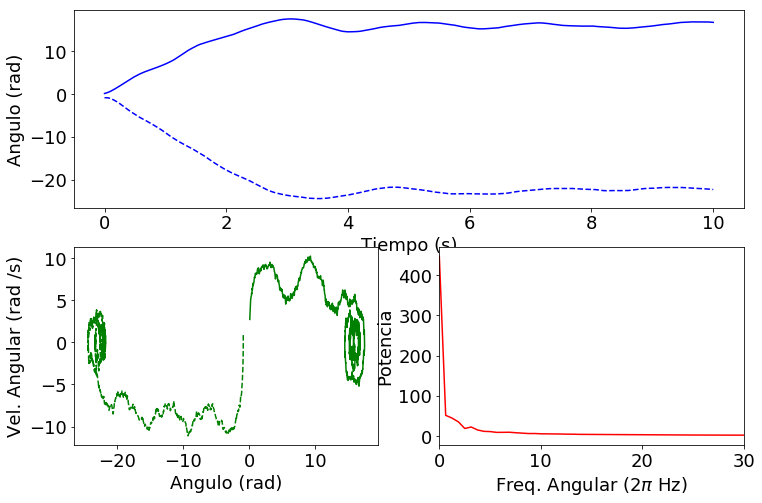

In [31]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

y = m_rungekutta4(pendulo5, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)

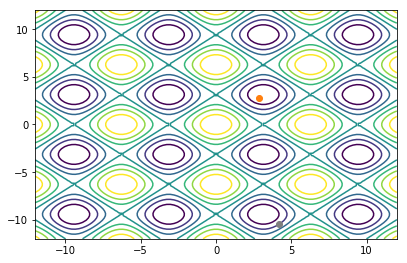

In [32]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-12,12,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
(xx,yy)=meshgrid(theta,theta)
ax.contour(xx,yy,cos(xx)+cos(yy)) 
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])

    
    '''
    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)
    '''

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('Evol2d_noise_inter_log.gif', writer='imagemagick', fps=24)

# Now we want to implement Reflecting boundary conditions

In [166]:
# Condiciones Iniciales
# angulos pequeños
M=10
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0
N=4000
def pendulo6(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        if(y[i]>LXf):
            dydt[i] = -abs(y[i+1]) 
        if(y[i]<LX0):
            dydt[i] = abs(y[i+1]) 
        
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['alpha']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        
        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        if(y[i+2*M]<LY0):
            dydt[i+2*M] = abs(y[i+1+2*M])
        if(y[i+2*M]>LYf):
            dydt[i+2*M] = -abs(y[i+1+2*M])
        
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['alpha']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 
t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo

In [167]:

def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=2
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=2
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return sin(yi)

def extFY(yi,wi,t):
    return sin(wi)

In [168]:
X_loc=0
X_scale=.5
VX_loc=0
VX_scale=1
Y_loc=0
Y_scale=.5
VY_loc=0
VY_scale=1
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)

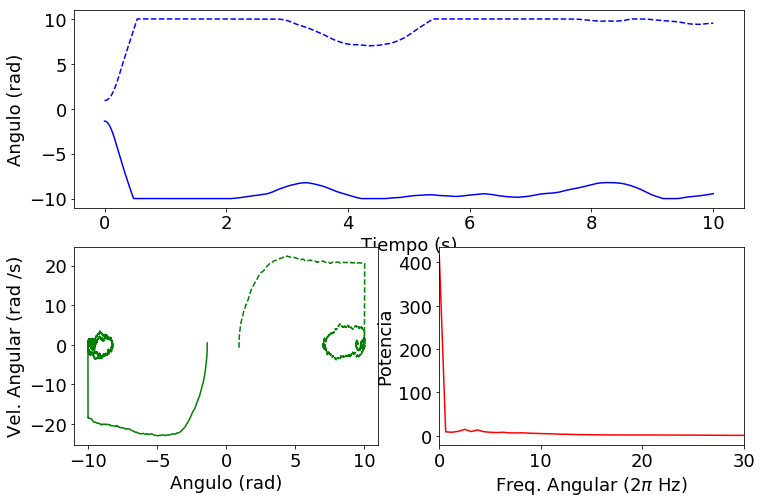

In [88]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

y = m_rungekutta4(pendulo6, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)

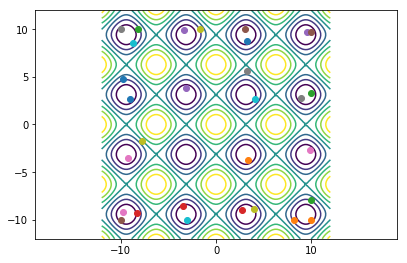

In [89]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-12,12,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
(xx,yy)=meshgrid(theta,theta)
ax.contour(xx,yy,cos(xx)+cos(yy)) 
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()
plt.axis('equal')
plt.axis([-12, 12, -12, 12])
# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])

    
    '''
    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)
    '''

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('test_ref_Evol2d_noise_inter_gauss.gif', writer='imagemagick', fps=24)

In [154]:
xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()



(array([  932.,  1313.,  1077.,  1418.,   825.,   408.,  1856.,  4037.,
         2400.,  2459.,  2479.,  2708.,  2245.,  4019.,  3975.,  2584.,
         1619.,  1257.,  1206.,  1203.]),
 array([-11.1917365 ,  -9.63218084,  -8.07262519,  -6.51306954,
         -4.95351388,  -3.39395823,  -1.83440258,  -0.27484693,
          1.28470873,   2.84426438,   4.40382003,   5.96337569,
          7.52293134,   9.08248699,  10.64204265,  12.2015983 ,
         13.76115395,  15.3207096 ,  16.88026526,  18.43982091,  19.99937656]),
 <a list of 20 Patch objects>)

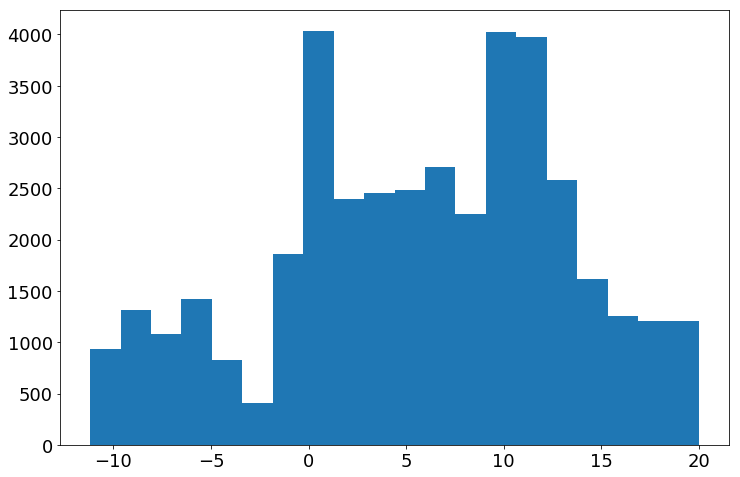

In [155]:
np.histogram(vxdata)
hist(vxdata, bins=20)

# Now we want to implement Periodic boundary conditions

In [138]:

def forceXper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceYper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2Xper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    signs_X=[np.sign(y1-y2),np.sign(y1-y2+LX),np.sign(y1-y2-LX)]
    delta_X=min([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])
    delta_Y=min([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])
    #the scale factor is handled as if it was uniform among all agents
    return signs_X[np.argmin([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])]*(delta_X/rangei)*exp(-0.5*(delta_X/rangei)**2-0.5*(delta_Y/rangei)**2)

def force2Yper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    signs_Y=[np.sign(w1-w2),np.sign(w1-w2+LX),np.sign(w1-w2-LX)]
    delta_X=min([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])
    delta_Y=min([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])
    #the scale factor is handled as if it was uniform among all agents
    return signs_Y[np.argmin([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])]*(delta_Y/rangei)*exp(-0.5*(delta_X/rangei)**2-0.5*(delta_Y/rangei)**2)


def force3Xper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    delta_X=min([y1-y2,y1-y2+LX,y1-y2-LX])
    delta_Y=min([w1-w2,w1-w2+LY,w1-w2-LY])
    #the scale factor is handled as if it was uniform among all agents
    return (delta_X)/((delta_Y)**2+(delta_X)**2)

def force3Yper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    delta_X=min([y1-y2,y1-y2+LX,y1-y2-LX])
    delta_Y=min([w1-w2,w1-w2+LY,w1-w2-LY])
    #the scale factor is handled as if it was uniform among all agents
    return (delta_Y)/((delta_Y)**2+(delta_X)**2)


def pairFXper(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Xper(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFYper(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Yper(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return sin(yi)

def extFY(yi,wi,t):
    return sin(wi)

In [139]:
def m_rungekutta4per(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
        
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
        
        y[i][:2*M:2]=y[i][:2*M:2]%(LXf-LX0)
        y[i][2*M:4*M:2]=y[i][2*M:4*M:2]%(LYf-LY0)
    return(y)

In [147]:
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0
N=2000


X_loc=10
X_scale=.5
VX_loc=0
VX_scale=1
Y_loc=10
Y_scale=.5
VY_loc=0
VY_scale=1

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo

#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)

In [148]:
def pendulo7(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairFXper(i,y,t) + args['omega']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        dydt[i+1+2*M] = args['alpha']*pairFYper(i,y,t) + args['omega']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 

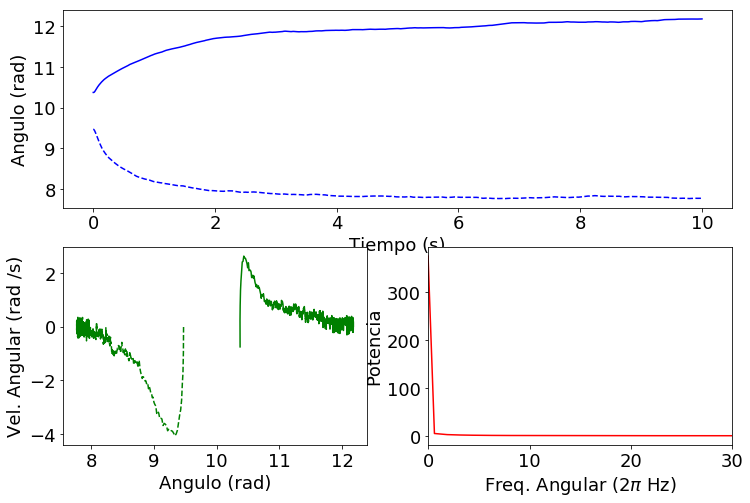

In [164]:
args_sol['alpha'] = 50
args_sol['beta'] = 50
args_sol['gamma'] = 500
args_sol['omega'] = 0

y = m_rungekutta4per(pendulo7, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)

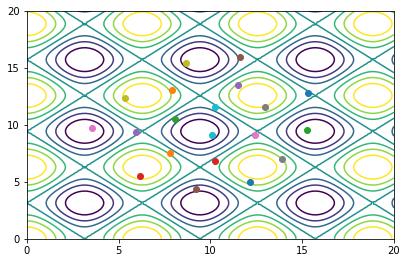

In [165]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-0,20))
ax.set_ylim((-0,20))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-0,20,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
(xx,yy)=meshgrid(theta,theta)
ax.contour(xx,yy,cos(xx)+cos(yy)) 
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])

    
    '''
    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)
    '''

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('per_Evol2d_noise_inter_gauss.gif', writer='imagemagick', fps=24)

In [158]:
xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()


In [159]:
np.histogram(vxdata)

(array([  692,   931,  1742,  2296, 24199,  4454,  2325,  1142,  1362,   877]),
 array([-135.62835131, -102.80375499,  -69.97915867,  -37.15456235,
          -4.32996603,   28.49463029,   61.31922661,   94.14382293,
         126.96841925,  159.79301557,  192.61761189]))

(array([   37.,    43.,   185.,  1253.,  1303.,  1276.,  1447.,  1586.,
         1795.,  1738.,  1566.,  1968.,  1240.,  1167.,  1205.,  1067.,
          853.,   207.,    46.,    28.]),
 array([-14.49932927, -13.05288795, -11.60644663, -10.1600053 ,
         -8.71356398,  -7.26712266,  -5.82068134,  -4.37424002,
         -2.9277987 ,  -1.48135738,  -0.03491606,   1.41152526,
          2.85796658,   4.3044079 ,   5.75084923,   7.19729055,
          8.64373187,  10.09017319,  11.53661451,  12.98305583,  14.42949715]),
 <a list of 20 Patch objects>)

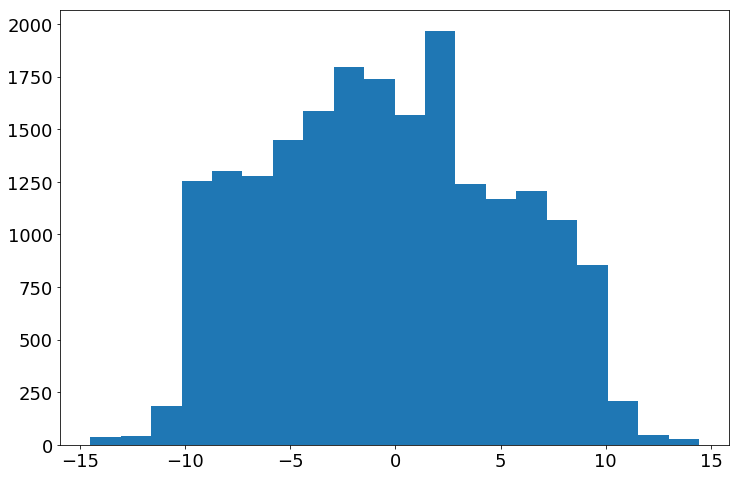

In [223]:
hist(vxdata, bins=20)

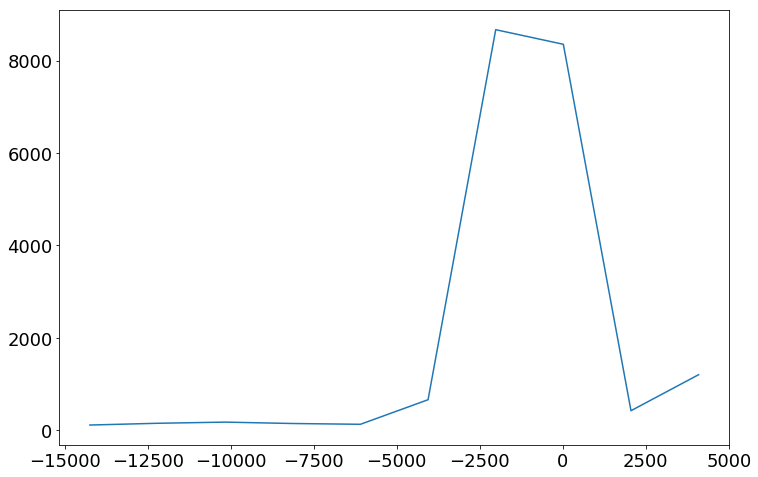

In [163]:
plot( array([-14246.48552755, -12208.76427325, -10171.04301895,  -8133.32176464,
        -6095.60051034,  -4057.87925604,  -2020.15800173,     17.56325257,
         2055.28450687,   4093.00576118]),array([ 111,  149,  174,  144,  127,  659, 8670, 8354,  421, 1201]))

# Test  1

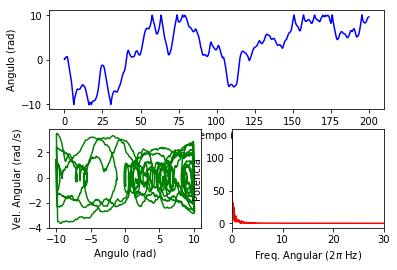

x (array([ 2361,  2313,  2653,  5150, 21022, 22113,  6957,  5634,  5122,  6695]), array([ -1.01634789e+01,  -8.13085379e+00,  -6.09822868e+00,
        -4.06560357e+00,  -2.03297845e+00,  -3.53339293e-04,
         2.03227177e+00,   4.06489689e+00,   6.09752200e+00,
         8.13014711e+00,   1.01627722e+01]))
vx (array([ 3234,  3312,  3356,  5935, 22209, 21695,  5808,  4018,  4455,  5998]), array([ -1.01552344e+01,  -8.12221780e+00,  -6.08920122e+00,
        -4.05618463e+00,  -2.02316805e+00,   9.84853173e-03,
         2.04286511e+00,   4.07588170e+00,   6.10889828e+00,
         8.14191486e+00,   1.01749314e+01]))
y (array([ 3568,  3202,  3397,  5668, 21589, 22887,  6022,  4250,  4579,  4858]), array([ -1.02178148e+01,  -8.17386059e+00,  -6.12990637e+00,
        -4.08595214e+00,  -2.04199792e+00,   1.95630883e-03,
         2.04591053e+00,   4.08986476e+00,   6.13381898e+00,
         8.17777321e+00,   1.02217274e+01]))
vy (array([ 2481,  3057,  3339,  5204, 21186, 21403,  6596,  4585,  5

In [11]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.fftpack as fft

def m_rungekutta4(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
    return(y)

def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/np.sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*np.pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')


####################
# Condiciones Iniciales
# angulos pequeños
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


X_loc=0
X_scale=2
VX_loc=0
VX_scale=2
Y_loc=0
Y_scale=2
VY_loc=0
VY_scale=2
#Positions
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)


g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 4000 # n_puntos
t = np.linspace(0., 200., N+1) # [s] arreglo de n_puntos en el tiempo



h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0

# definir los argumentos
args_sol = {}
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

############################


############################


def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return np.sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -np.sin((w1-w2))

def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return np.sin(yi-t)

def extFY(yi,wi,t):
    return np.sin(wi-t)

####################

# Condiciones Iniciales
# angulos pequeños

def pendulo6(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        if(y[i]>LXf):
            y[i+1] = -abs(y[i+1]) 
        if(y[i]<LX0):
            y[i+1] = abs(y[i+1]) 
        
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['omega']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        
        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        if(y[i+2*M]<LY0):
            y[i+1+2*M] = abs(y[i+1+2*M])
        if(y[i+2*M]>LYf):
            y[i+1+2*M] = -abs(y[i+1+2*M])
        
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['omega']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 




args_sol['alpha'] = 10
args_sol['beta'] = 0.1
args_sol['gamma'] = 10
args_sol['omega'] =  1


y = m_rungekutta4(pendulo6, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)
plt.show()


xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()

print("x",np.histogram(xdata))
print("vx",np.histogram(vxdata))
print("y",np.histogram(ydata))
print("vy",np.histogram(vydata))

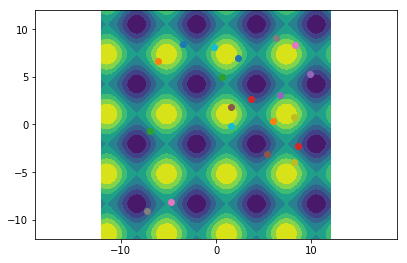

In [16]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-12,12,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate

(xx,yy)=meshgrid(theta,theta)
#ax.contour(xx,yy,(xx)**2+(yy)**2) 
#ax.contour(xx,yy,cos(xx)+cos(yy))
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()
plt.axis('equal')
plt.axis([-12, 12, -12, 12])
# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])
    ax.set_xlim((-12,12))
    ax.set_ylim((-12,12))
    ax.contourf(xx,yy,cos(xx-t[i])+cos(yy-t[i]))
    

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('test_ref.gif', writer='imagemagick', fps=24)

(array([  1221.,   1140.,   1109.,   1204.,   1221.,   1432.,   1878.,
          3272.,   8260.,  12762.,  13518.,   8595.,   3930.,   3027.,
          2670.,   2964.,   2843.,   2279.,   2743.,   3952.]),
 array([ -1.01634789e+01,  -9.14716635e+00,  -8.13085379e+00,
         -7.11454124e+00,  -6.09822868e+00,  -5.08191612e+00,
         -4.06560357e+00,  -3.04929101e+00,  -2.03297845e+00,
         -1.01666590e+00,  -3.53339293e-04,   1.01595922e+00,
          2.03227177e+00,   3.04858433e+00,   4.06489689e+00,
          5.08120944e+00,   6.09752200e+00,   7.11383456e+00,
          8.13014711e+00,   9.14645967e+00,   1.01627722e+01]),
 <a list of 20 Patch objects>)

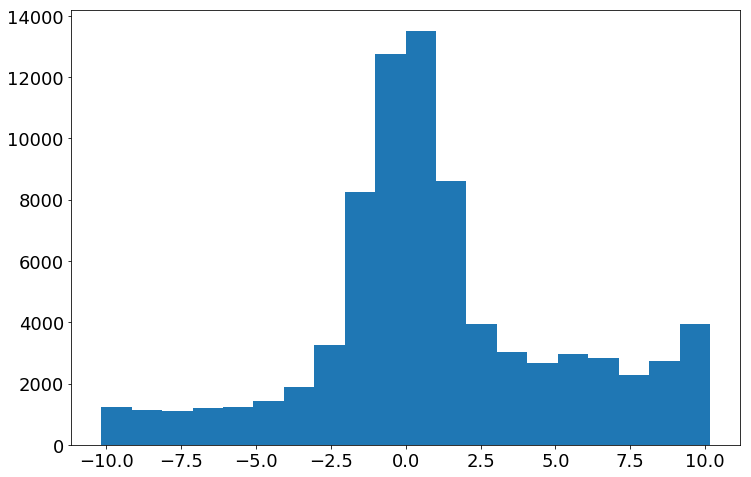

In [17]:
hist(xdata, bins=20)

In [18]:
xedges = arange(LX0,LXf,1)
yedges = arange(LY0,LYf,1)
H, xedges, yedges = np.histogram2d(y[:,0:2*M:2].flatten(), y[:,2*M:4*M:2].flatten(),bins=(xedges, yedges))
H = H.T 
 # Let each row list bins with common y range.

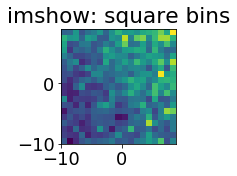

In [19]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='low',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [21]:
50*4*10000

2000000